## What is PCA?
Dimentionality reduction. 

EDIT: after doing this, no clue

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from ue.uexp.dataprocessing.processor_binance import BinanceProcessor

In [2]:
### get data (set config params)
ticker_list = ["BTCUSDT","ETHUSDT","SOLUSDT", "DOGEUSDT", "SHIBUSDT", "LUNAUSDT", "BNBUSDT"]
start_date = "2021-12-30"
end_date = "2021-12-31"
time_interval = "1m"

p = BinanceProcessor("binance")
df = p.download_data(ticker_list, start_date, end_date, time_interval)
#df = df[['time','close']]

/Users/dan/Desktop/projects/uexp/ue/uexp/dataprocessing/processor_binance.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_df)
/Users/dan/Desktop/projects/uexp/ue/uexp/dataprocessing/processor_binance.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df)
/Users/dan/Desktop/projects/uexp/ue/uexp/dataprocessing/processor_binance.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_df)
/Users/dan/Desktop/projects/uexp/ue/uexp/dataprocessing/processor_binance.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df)
/U

In [3]:
for t in df.tic.unique():
    df[t] = df[df['tic'] == t]['close']

In [4]:
df = df[['time'] + list(df.tic.unique())]

In [5]:
df

,time,BTCUSDT,ETHUSDT,SOLUSDT,DOGEUSDT,SHIBUSDT,LUNAUSDT,BNBUSDT
0,2021-12-30 00:00:00,46768.36,3675.94,171.16,0.1704,0.000034,82.76,515.6
1,2021-12-30 00:01:00,46756.41,3673.38,171.07,0.1702,0.000033,82.67,515.3
2,2021-12-30 00:02:00,46752.86,3671.35,171.10,0.1701,0.000033,82.61,515.5
3,2021-12-30 00:03:00,46762.44,3670.80,171.09,0.1701,0.000033,82.62,515.6
4,2021-12-30 00:04:00,46776.73,3672.61,171.10,0.1702,0.000033,82.75,515.9
...,...,...,...,...,...,...,...,...
994,2021-12-30 16:34:00,47120.78,3712.25,172.71,0.1716,0.000034,84.10,518.5
995,2021-12-30 16:35:00,47047.98,3711.06,172.51,0.1715,0.000034,84.02,517.7
996,2021-12-30 16:36:00,47029.44,3709.66,172.38,0.1715,0.000034,84.02,517.4
997,2021-12-30 16:37:00,47008.00,3707.52,172.36,0.1714,0.000034,83.95,517.1


In [6]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df

,BTCUSDT,ETHUSDT,SOLUSDT,DOGEUSDT,SHIBUSDT,LUNAUSDT,BNBUSDT
time,,,,,,,
2021-12-30 00:00:00,46768.36,3675.94,171.16,0.1704,0.000034,82.76,515.6
2021-12-30 00:01:00,46756.41,3673.38,171.07,0.1702,0.000033,82.67,515.3
2021-12-30 00:02:00,46752.86,3671.35,171.10,0.1701,0.000033,82.61,515.5
2021-12-30 00:03:00,46762.44,3670.80,171.09,0.1701,0.000033,82.62,515.6
2021-12-30 00:04:00,46776.73,3672.61,171.10,0.1702,0.000033,82.75,515.9
...,...,...,...,...,...,...,...
2021-12-30 16:34:00,47120.78,3712.25,172.71,0.1716,0.000034,84.10,518.5
2021-12-30 16:35:00,47047.98,3711.06,172.51,0.1715,0.000034,84.02,517.7
2021-12-30 16:36:00,47029.44,3709.66,172.38,0.1715,0.000034,84.02,517.4


In [7]:
df.index

DatetimeIndex(['2021-12-30 00:00:00', '2021-12-30 00:01:00',
               '2021-12-30 00:02:00', '2021-12-30 00:03:00',
               '2021-12-30 00:04:00', '2021-12-30 00:05:00',
               '2021-12-30 00:06:00', '2021-12-30 00:07:00',
               '2021-12-30 00:08:00', '2021-12-30 00:09:00',
               ...
               '2021-12-30 16:29:00', '2021-12-30 16:30:00',
               '2021-12-30 16:31:00', '2021-12-30 16:32:00',
               '2021-12-30 16:33:00', '2021-12-30 16:34:00',
               '2021-12-30 16:35:00', '2021-12-30 16:36:00',
               '2021-12-30 16:37:00', '2021-12-30 16:38:00'],
              dtype='datetime64[ns]', name='time', length=6993, freq=None)

In [8]:
returns = df.pct_change()

In [9]:
returns.dropna(inplace=True)

In [10]:
returns.shape

(6992, 7)

In [11]:
returns

,BTCUSDT,ETHUSDT,SOLUSDT,DOGEUSDT,SHIBUSDT,LUNAUSDT,BNBUSDT
time,,,,,,,
2021-12-30 00:01:00,-0.000256,-0.000696,-0.000526,-0.001174,-0.001791,-0.001087,-0.000582
2021-12-30 00:02:00,-0.000076,-0.000553,0.000175,-0.000588,-0.000299,-0.000726,0.000388
2021-12-30 00:03:00,0.000205,-0.000150,-0.000058,0.000000,-0.000598,0.000121,0.000194
2021-12-30 00:04:00,0.000306,0.000493,0.000058,0.000588,-0.000599,0.001573,0.000582
2021-12-30 00:05:00,-0.000549,-0.000139,0.000175,-0.000588,0.000599,-0.000363,-0.000582
...,...,...,...,...,...,...,...
2021-12-30 16:34:00,-0.001536,-0.001823,-0.001099,-0.001164,-0.001482,-0.001780,-0.000963
2021-12-30 16:35:00,-0.001545,-0.000321,-0.001158,-0.000583,-0.002078,-0.000951,-0.001543
2021-12-30 16:36:00,-0.000394,-0.000377,-0.000754,0.000000,0.000595,0.000000,-0.000579


In [12]:
N_PRINCIPAL_COMPONENTS = 3
pca = PCA(n_components=N_PRINCIPAL_COMPONENTS)
pca.fit(returns)

PCA(n_components=3)

In [13]:
pre_process = pca.components_.T 
pre_process.shape

(7, 3)

In [14]:
# X = pre_process ^
X = pca.components_.T 

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from statsmodels.tsa.stattools import coint

pre_process = preprocessing.StandardScaler().fit_transform(X)
print(pre_process.shape)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=30, n_init=10, random_state=7)
kmeans.fit(pre_process)
labels = kmeans.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("\nClusters discovered: %d" % n_clusters_)
clustered = kmeans.labels_

(7, 3)

Clusters discovered: 3


/Users/dan/miniforge3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [16]:
clustered_series = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series_all = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series = clustered_series[clustered_series != -1]

In [17]:
X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)

/Users/dan/miniforge3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


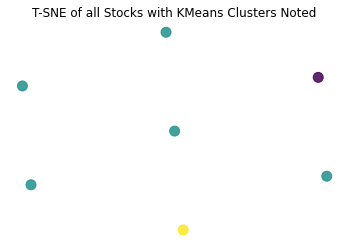

In [18]:
import matplotlib.pyplot as plt
plt.figure(1, facecolor='white')
plt.clf()
plt.axis('off')

plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1]
)

plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
)

plt.title('T-SNE of all Stocks with KMeans Clusters Noted');